# Do App Ratings Lie?
## Exploratory Data Analysis – Google Play Store Apps

**Objective:**
This notebook explores whether app ratings on the Google Play Store truly reflect user satisfaction or if they are influenced by factors such as review count, pricing model, and app category.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

## Upload Dataset
Upload `googleplaystore.csv` downloaded from Kaggle.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore (1).csv


In [3]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Initial Inspection

In [4]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum().sort_values(ascending=False)

,0
Rating,1474
Current Ver,8
Android Ver,3
Content Rating,1
Type,1
Size,0
Reviews,0
Category,0
App,0
Price,0


## Data Cleaning (Minimal – EDA Focused)

In [6]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df[df['Rating'] <= 5]

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df = df.dropna(subset=['Rating'])

## Distribution of Ratings

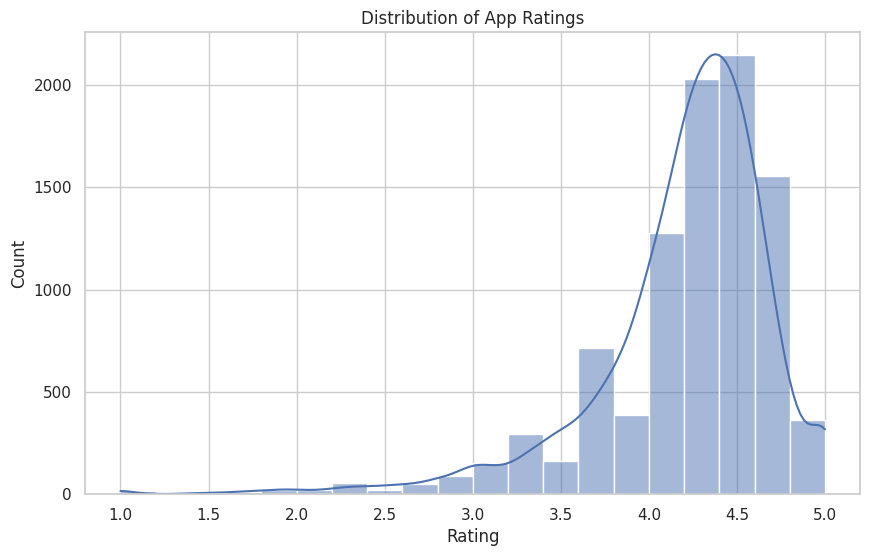

In [7]:
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Insight:** Ratings are heavily skewed towards higher values, suggesting possible rating inflation.

## Rating vs Number of Reviews

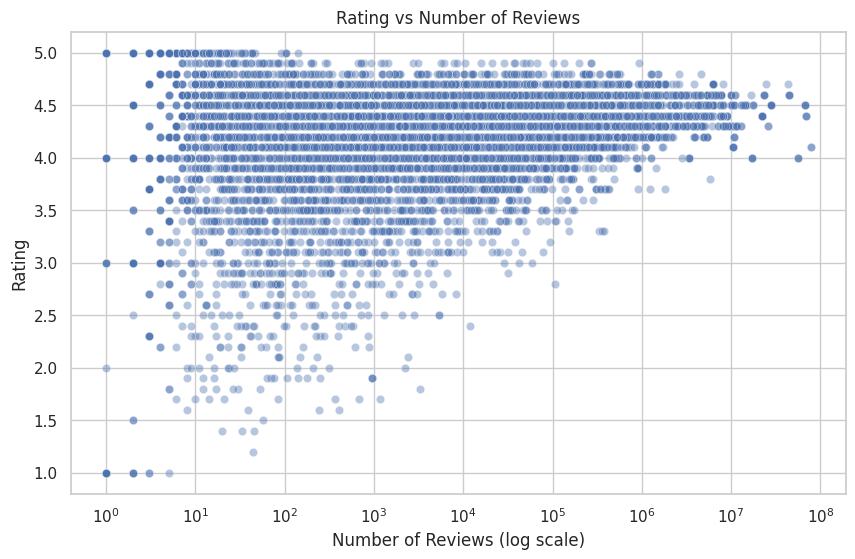

In [8]:
sns.scatterplot(data=df, x='Reviews', y='Rating', alpha=0.4)
plt.xscale('log')
plt.title('Rating vs Number of Reviews')
plt.xlabel('Number of Reviews (log scale)')
plt.ylabel('Rating')
plt.show()

**Insight:** Apps with very few reviews often show extreme ratings, while ratings stabilize as review count increases.

## Free vs Paid Apps

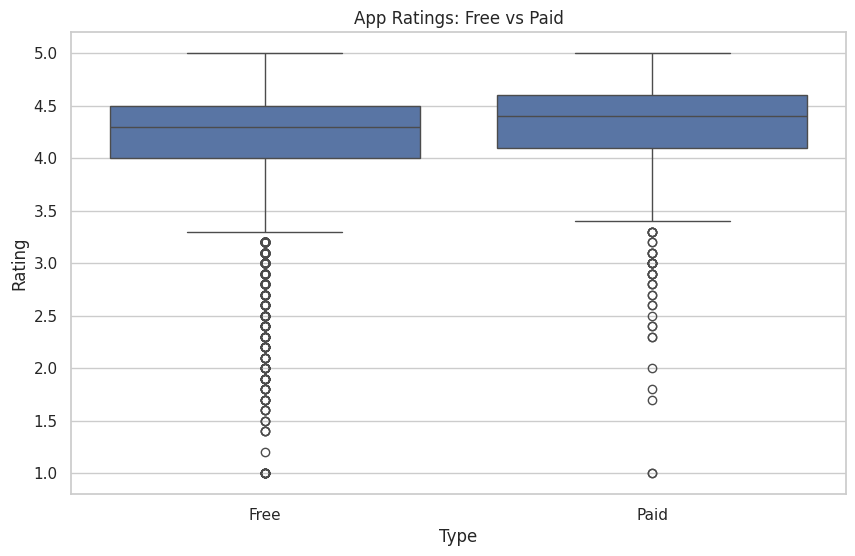

In [9]:
sns.boxplot(data=df, x='Type', y='Rating')
plt.title('App Ratings: Free vs Paid')
plt.show()

**Insight:** Paid apps tend to have slightly more consistent ratings compared to free apps.

## Category-wise Rating Analysis

In [10]:
category_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
category_rating.head(10)

,Rating
Category,
EVENTS,4.435556
EDUCATION,4.389032
ART_AND_DESIGN,4.358065
BOOKS_AND_REFERENCE,4.346067
PERSONALIZATION,4.335987
PARENTING,4.300000
GAME,4.286326
BEAUTY,4.278571
HEALTH_AND_FITNESS,4.277104


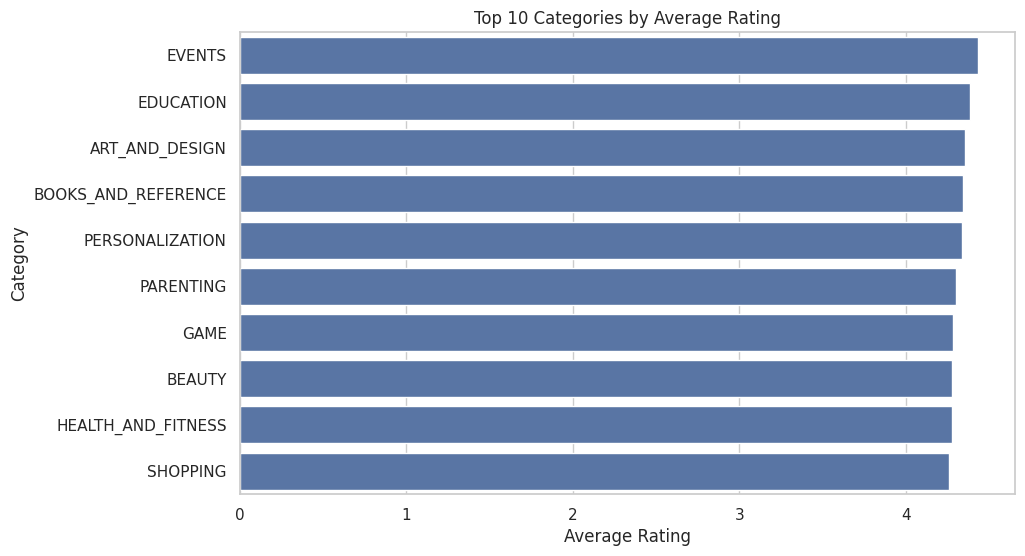

In [11]:
sns.barplot(x=category_rating.values[:10], y=category_rating.index[:10])
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

**Note:** Categories with very few apps may appear overrated due to small sample size.

## Key Takeaways

- App ratings are generally inflated and clustered at the high end
- Review count adds credibility to ratings
- Paid apps show lower variance in ratings
- Category-level averages should be interpreted with caution